In [1]:
# Import libraries
import pandas as pd
# Importamos la librería
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook


# Linpack Benchmark

In [2]:
# load data
df = pd.read_excel('benchmarks.xlsx', 
                   sheet_name = 'linpack')

#Slide data by threads number
df_1_t = df[df.Threads == 1]
df_2_t = df[df.Threads == 2]
df_3_t = df[df.Threads == 3]
df_4_t = df[df.Threads == 4]
df_5_t = df[df.Threads == 5]

df.head()

,Threads,Size,Time,GFLOPS
0,1,1000,0.065,10.3029
1,1,2000,0.458,11.6746
2,1,5000,6.669,12.5033
3,1,10000,51.598,12.9242
4,1,15000,171.565,13.1172


Text(0.5, 1.0, 'Number of FLOPS for 1 thread')

/home/leo/Escritorio/magister_uach/env/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


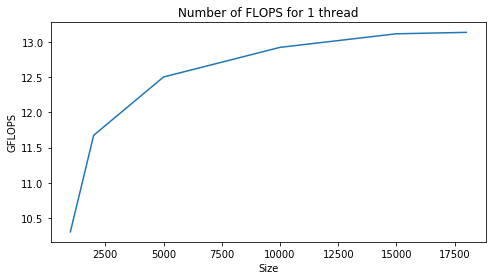

In [3]:
# plot for 1 thread

fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

ax.plot(df_1_t['Size'], df_1_t['GFLOPS'])
#ax.plot(df_1_t['Size'], df_1_t['Time'])

ax.set_xlabel('Size')
ax.set_ylabel('GFLOPS')
ax.set_title('Number of FLOPS for 1 thread')

Para un número de thread constante, se tiene que para pequeños tamaños de las matrices, los valores de FLOPS son bajos. Luego, aumentando el tamaño de la matriz, se obtiene un mayor número de FLOPS. Finalmente se observa que se detiene el crecimiento de la curva para valores mayores de matriz (mayores a 15.000). Por lo tanto, se tiene mayor rendimiento al aumentar el tamaño de matricial, sin embargo alcanzando un valor superior a 15.000, éste tiende a mantenerse constante.

<IPython.core.display.Javascript object>


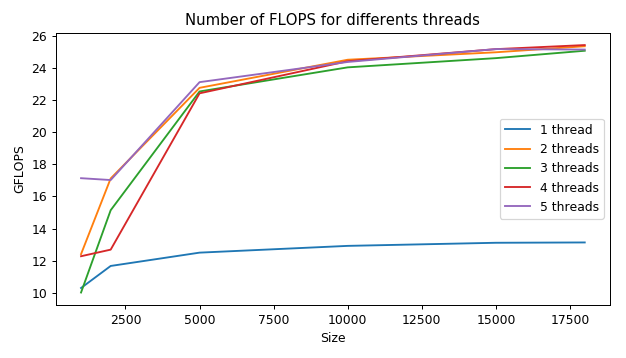

Text(0.5, 1.0, 'Number of FLOPS for differents threads')

In [100]:
# plot for differents threads

# Plot 
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
#threads = df['Threads'].unique()

#print(threads)
ax.plot(df_1_t['Size'], df_1_t['GFLOPS'], label = "1 thread")
ax.plot(df_2_t['Size'], df_2_t['GFLOPS'], label = "2 threads")
ax.plot(df_3_t['Size'], df_3_t['GFLOPS'], label = "3 threads")
ax.plot(df_4_t['Size'], df_4_t['GFLOPS'], label = "4 threads")
ax.plot(df_5_t['Size'], df_5_t['GFLOPS'], label = "5 threads")

ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('GFLOPS')
ax.set_title('Number of FLOPS for differents threads')
#ax.plot(x = 'Size', y = 'GFLOPS')
#df.plot(x = 'Size', y = 'GFLOPS', colors = threads)

Teniendo más de 1 thread, se tienen mayores valores de FLOPS para un tamaño de matriz dado, haciendo más eficiente el desempeño, ya que las operaciones matriciales son paralelizadas.

Los valores de FLOPS no varían de manera significativa al aumentar el número de threads, lo que podría deberse a que se tienen 2 cores en la máquina en donde se ejecuta el análisis, por lo que al ejecutar 2 threads, cada una se podría asignar a cada core, sin embargo, al aumentar a mas de 2 threads, cada thread adicional se ejecutaría en un core anteriormente utilizado.

Por lo tanto, para este caso (con este test y con la máquina utilizada actualmente), se tiene que para obtener mejor rendimiento se debe utilizar un número de threads igual al número de núcleos (2 para este caso).

# I/O Benchmark

In [37]:
# Load data
# load data
df_io = pd.read_excel('benchmarks.xlsx', 
                   sheet_name = 'I_O_Backup')

# transform to MB
df_io['bs'] = df_io['bs']/(1e6)

# transform to MB/s
df_io['bytes/s'] = df_io['bytes/s']/(1e6)

# Split data by cache
df_io_cache = df_io[df_io.Cache == 1]
df_io_no_cache = df_io[df_io.Cache == 0]


df_io

,bs,Cache,bytes/s,Unnamed: 3,Unnamed: 4
0,1000.000,1,63.7000,NaN,Validados
1,1000.000,1,47.4000,NaN,NaN
2,1000.000,1,63.0000,NaN,NaN
3,1000.000,1,62.5000,NaN,NaN
4,1000.000,0,59.1000,NaN,NaN
5,1000.000,0,59.3000,NaN,NaN
6,1000.000,0,60.2000,NaN,NaN
7,1000.000,0,59.9000,NaN,NaN
8,1.000,1,55.8000,NaN,NaN
9,1.000,1,64.0000,NaN,NaN


Text(0.5, 1.0, 'MB/s vs size of matrix')

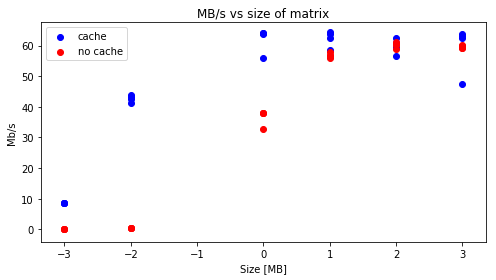

In [40]:
# Plot data

fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

ax.scatter(np.log10(df_io_cache['bs']), df_io_cache['bytes/s'], label = 'cache', color = 'blue')
#ax.scatter(df_io_cache['bs'], df_io_cache['bytes/s'], label = 'cache', color = 'blue')
ax.scatter(np.log10(df_io_no_cache['bs']), df_io_no_cache['bytes/s'], label = 'no cache', color = 'red')
#ax.scatter(df_io_no_cache['bs'], df_io_no_cache['bytes/s'], label = 'no cache', color = 'red')

ax.legend()
ax.set_xlabel('Size [MB]')
ax.set_ylabel('Mb/s')
ax.set_title('MB/s vs size of matrix')

# GPU Benchmark

In [9]:
from IPython.display import HTML, display

data = [
        ['FPS', 6.3],
        ['Score', 158],
        ['Min FPS', 3.9],
        ['Max FPS', 10.5],
        ['Min T° GPU', 74],
        ['Max T° GPU', 80],
        ]


display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

FPS,6.3
Score,158
Min FPS,3.9
Max FPS,10.5
Min T° GPU,74
Max T° GPU,80


El valor promedio de FPS fué de 6,3, en donde el mínimo y máximo corresponden a 3,9 y 10,5 respectivamente. Para el caso del score en el test, se obtuvo un valor de 158. Desde un portal web en donde se presenta ranking de scores obtenidos (https://www.techpowerup.com/forums/threads/unigine-heaven-4-0-benchmark-scores.198888/), se tiene que el máximo valor es cercano a 2.900, por lo que al compararlo con este valor, se tiene una enorme diferecia. Para el caso de la temperatura de GPU, ésta aumenta progresivamente desde 74 a 80 [°C].